# Tutorial on how to collect tweets based on key words

This notebook shows you how to use the [tweepy](https://www.tweepy.org/) python library to collect tweets from Twitter based on key words. 

This notebook was created as an example of a dataset you can collect for the [AFD Gender-Based Violence Dataset Collection Challenge](https://zindi.africa/competitions/afd-gender-based-violence-dataset-collection-challenge).

TW: This notebook collects tweets that could contain sensative. 

## STEP 1: PYTHON PACKAGES INSTALLATION

Install the following python packages that will help you to collect data from twiter.com 

In [18]:
!pip install tweepy 

In [19]:
!pip install unidecode

     |████████████████████████████████| 245kB 6.1MB/s 


## STEP 2: IMPORT IMPORTANT PACKAGES 

In [20]:
#import dependencies
import tweepy
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
from unidecode import unidecode
import time
import datetime
from tqdm import tqdm 
import pandas as pd  
import numpy as np 

## STEP 3:AUTHENTICATING TO Twitter’s API

(a) First, apply for a developer account to access the API. The Standard APIs are sufficient for this tutorial. They’re free, but have some limitations that we’ll learn to work around in this tutorial.

Click here to apply: [apply for developer account to acces the API](https://developer.twitter.com/en/apply-for-access)

(b) Once your developer account is setup, create an app that will make use of the API by clicking on your username in the top right corner to open the drop down menu, and clicking “Apps” as shown below. Then select “Create an app” and fill out the form. 

(c) Now that you have created a developer account and an app, you should have a set of keys to connect to the Twitter API. Specifically, you’ll have an
- API key
- API secret key
- Access token
- Access token secret

These could be inserted directly into your code to connect to the Twitter API, as shown below.

In [21]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

## STEP 4:  CONNECT TO TWITTER API USING THE SECRETS

In [22]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## STEP 5: DEFINE A FUNCTION THAT WILL TAKE OUR SEARCH QUERY

In [23]:
def tweetSearch(query, limit):
    """
    This function will search a query provided in the twitter and,
    retun a list of all tweets that have a query. 
    """

    # Create a blank variable
    tweets = []

    # Iterate through Twitter using Tweepy to find our query with our defined limit
    for page in tweepy.Cursor(
        api.search, q=query, count=limit, tweet_mode="extended"
    ).pages(limit):
        for tweet in page:
            tweets.append(tweet)

    # return tweets
    return tweets

## STEP 6: CREATE A FUNCTION TO SAVE TWEETS INTO A DATAFRAME

In [24]:
def tweets_to_data_frame(tweets):
    """
    This function will receive tweets and collect specific data from it such as place, tweet's text,likes 
    retweets and save them into a pandas data frame.
    
    This function will return a pandas data frame that contains data from twitter.
    """
    df = pd.DataFrame(data=[tweet.full_text.encode('utf-8') for tweet in tweets], columns=["Tweets"])

    df["id"] = np.array([tweet.id for tweet in tweets])
    df["lens"] = np.array([len(tweet.full_text) for tweet in tweets])
    df["date"] = np.array([tweet.created_at for tweet in tweets])
    df["place"] = np.array([tweet.place for tweet in tweets])
    df["coordinateS"] = np.array([tweet.coordinates for tweet in tweets])
    df["lang"] = np.array([tweet.lang for tweet in tweets])
    df["source"] = np.array([tweet.source for tweet in tweets])
    df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
    df["retweets"] = np.array([tweet.retweet_count for tweet in tweets])
    
    
    return df

## STEP 7: ADD TWITTER HASHTAGS RELATED TO GENDER BASED VIOLENCE

In [25]:
# add hashtags in the following list
hashtags = [
'#GBV',
'#sexism',
'#rape'    
]

## STEP 8: RUN BOTH FUNCTIONS TO COLLECT DATA FROM TWITTER RELATED TO THE HASHTAGS LISTED ABOVE

In [ ]:
def clean_tweet(self, tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(self, tweet):
    analysis = TextBlob(self.clean_tweet(tweet))

    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
total_tweets = 0

"""
The following for loop will collect a tweets that have the hashtags
 mentioned in the list and save the tweets into csv file
"""

for n in tqdm(hashtags):
    # first we fetch all tweets that have specific hashtag
    hash_tweets = tweetSearch(query=n,limit=7000)
    total_tweets += int(len(hash_tweets))
    
    # second we convert our tweets into datarame
    df = tweets_to_data_frame(hash_tweets)
    
   
    #third we save the dataframe into csv file
    df.to_csv("{}_tweets.csv".format(n))

In [ ]:
# show total number of tweets collected
print("total_tweets: {}".format(total_tweets))

For more tweepy configuration please read the tweepy documentation [here](https://docs.tweepy.org/en/latest/)

This notebook prepared by

**Davis David** 

**Zindi Ambassador in Tanzania**

My zindi Profile: [https://zindi.africa/users/Davisy](https://zindi.africa/users/Davisy)

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df=pd.read_csv('/content/drive/MyDrive/#sexism_tweets.csv')
df.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
0,0,"b'Also, if you are grouping people by race or ...",1389850178543251457,198,2021-05-05 07:51:19,NaN,NaN,en,Twitter for iPhone,0,0
1,1,"b'There\xe2\x80\x99s enough #racism, #sexism, ...",1389850176873922560,178,2021-05-05 07:51:18,NaN,NaN,en,Twitter for iPhone,0,0
2,2,b'@fawcettsociety Of course it is; organisatio...,1389847124632907781,292,2021-05-05 07:39:11,NaN,NaN,en,Twitter for iPhone,4,0
3,3,b'Neha Bhargava explains how #marriage and #re...,1389844814217240581,218,2021-05-05 07:30:00,NaN,NaN,en,Twitter Web App,0,0
4,4,b'Jesus christ....\n#meme #offensivememes #mem...,1389838759840174085,174,2021-05-05 07:05:56,NaN,NaN,da,Twitter for Android,1,0


**LEMMATIZATION**

In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [45]:
df['Tweets_new'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")

In [ ]:
df

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,Tweets_new
0,0,"b'Also, if you are grouping people by race or ...",1389850178543251457,198,2021-05-05 07:51:19,NaN,NaN,en,Twitter for iPhone,0,0,"b'Also, if you are grouping people by race or ..."
1,1,"b'There\xe2\x80\x99s enough #racism, #sexism, ...",1389850176873922560,178,2021-05-05 07:51:18,NaN,NaN,en,Twitter for iPhone,0,0,"b'There\xe2\x80\x99s enough #racism, #sexism, ..."
2,2,b'@fawcettsociety Of course it is; organisatio...,1389847124632907781,292,2021-05-05 07:39:11,NaN,NaN,en,Twitter for iPhone,4,0,b' Of course it is; organisations which are me...
3,3,b'Neha Bhargava explains how #marriage and #re...,1389844814217240581,218,2021-05-05 07:30:00,NaN,NaN,en,Twitter Web App,0,0,b'Neha Bhargava explains how #marriage and #re...
4,4,b'Jesus christ....\n#meme #offensivememes #mem...,1389838759840174085,174,2021-05-05 07:05:56,NaN,NaN,da,Twitter for Android,1,0,b'Jesus christ....\n#meme #offensivememes #mem...
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1108,"b'RT @SandraNavidi: Ursula von der Leyen, one ...",1387014874149031936,135,2021-04-27 12:04:50,NaN,NaN,en,Twitter for iPhone,0,1,"b'RT : Ursula von der Leyen, one of the most p..."
1109,1109,"b'Ursula von der Leyen, one of the most powerf...",1387014261969465348,117,2021-04-27 12:02:24,NaN,NaN,en,Twitter Web App,9,1,"b'Ursula von der Leyen, one of the most powerf..."
1110,1110,b'RT @SkaKeller: Very good that @vonderleyen p...,1387012333734666241,140,2021-04-27 11:54:44,NaN,NaN,en,Twitter for Android,0,22,b'RT : Very good that points out that of she ...
1111,1111,b'RT @CoE_endVAW: \xe2\x9b\x94\xef\xb8\x8fThe ...,1387009667201740801,139,2021-04-27 11:44:08,NaN,NaN,en,Twitter Web App,0,11,b'RT : \xe2\x9b\x94\xef\xb8\x8fThe project \xe...


In [46]:
df['Tweets_new'] = df['Tweets_new'].str.replace("[^a-zA-Z#]", " ")
df['Tweets_new']

0       b Also  if you are grouping people by race or ...
1       b There xe  x   x  s enough #racism  #sexism  ...
2       b  Of course it is  organisations which are me...
3       b Neha Bhargava explains how #marriage and #re...
4       b Jesus christ     n#meme #offensivememes #mem...
                              ...                        
1108    b RT   Ursula von der Leyen  one of the most p...
1109    b Ursula von der Leyen  one of the most powerf...
1110    b RT   Very good that  points out that of she ...
1111    b RT    xe  x b x   xef xb  x fThe project  xe...
1112    b #EU Commission president Ursula  yesterday b...
Name: Tweets_new, Length: 1113, dtype: object

In [47]:
df['Tweets_new'] = df['Tweets_new'].str.replace("[x]", " ")
df['Tweets_new']

0       b Also  if you are grouping people by race or ...
1       b There  e         s enough #racism  #se ism  ...
2       b  Of course it is  organisations which are me...
3       b Neha Bhargava e plains how #marriage and #re...
4       b Jesus christ     n#meme #offensivememes #mem...
                              ...                        
1108    b RT   Ursula von der Leyen  one of the most p...
1109    b Ursula von der Leyen  one of the most powerf...
1110    b RT   Very good that  points out that of she ...
1111    b RT     e    b      ef  b    fThe project   e...
1112    b #EU Commission president Ursula  yesterday b...
Name: Tweets_new, Length: 1113, dtype: object

In [48]:
df['Tweets_new'] = df['Tweets_new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

In [49]:
df

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,Tweets_new
0,0,"b'Also, if you are grouping people by race or ...",1389850178543251457,198,2021-05-05 07:51:19,NaN,NaN,en,Twitter for iPhone,0,0,grouping people gender homogenising those grou...
1,1,"b'There\xe2\x80\x99s enough #racism, #sexism, ...",1389850176873922560,178,2021-05-05 07:51:18,NaN,NaN,en,Twitter for iPhone,0,0,There enough #racism #injustice #prejudice wor...
2,2,b'@fawcettsociety Of course it is; organisatio...,1389847124632907781,292,2021-05-05 07:39:11,NaN,NaN,en,Twitter for iPhone,4,0,course organisations which meant redress balan...
3,3,b'Neha Bhargava explains how #marriage and #re...,1389844814217240581,218,2021-05-05 07:30:00,NaN,NaN,en,Twitter Web App,0,0,Bhargava plains #marriage #religion hampers #g...
4,4,b'Jesus christ....\n#meme #offensivememes #mem...,1389838759840174085,174,2021-05-05 07:05:56,NaN,NaN,da,Twitter for Android,1,0,Jesus christ n#meme #offensivememes #meme #off...
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1108,"b'RT @SandraNavidi: Ursula von der Leyen, one ...",1387014874149031936,135,2021-04-27 12:04:50,NaN,NaN,en,Twitter for iPhone,0,1,Ursula Leyen powerful #women Europe still face...
1109,1109,"b'Ursula von der Leyen, one of the most powerf...",1387014261969465348,117,2021-04-27 12:02:24,NaN,NaN,en,Twitter Web App,9,1,Ursula Leyen powerful #women Europe still face...
1110,1110,b'RT @SkaKeller: Very good that @vonderleyen p...,1387012333734666241,140,2021-04-27 11:54:44,NaN,NaN,en,Twitter for Android,0,22,points suffer position about those women
1111,1111,b'RT @CoE_endVAW: \xe2\x9b\x94\xef\xb8\x8fThe ...,1387009667201740801,139,2021-04-27 11:44:08,NaN,NaN,en,Twitter Web App,0,11,project c#MobiliseAgainstSe conducted countrie...


In [50]:
tokenized_tweet = df['Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [b'Also,, if, you, are, grouping, people, by, ...
1    [b'There\xe2\x80\x99s, enough, #racism,, #sexi...
2    [b'@fawcettsociety, Of, course, it, is;, organ...
3    [b'Neha, Bhargava, explains, how, #marriage, a...
4    [b'Jesus, christ....\n#meme, #offensivememes, ...
Name: Tweets, dtype: object

In [51]:
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
lemmatizer=WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')


tokenized_tweet = tokenized_tweet.apply(lambda words: [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]) # stemming
tokenized_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [b'Also,, grouping, people, race, gender,, &am...
1    [b'There\xe2\x80\x99s, enough, #racism,, #sexi...
2    [b'@fawcettsociety, Of, course, is;, organisat...
3    [b'Neha, Bhargava, explains, #marriage, #relig...
4    [b'Jesus, christ....\n#meme, #offensivememes, ...
Name: Tweets, dtype: object

In [52]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ''.join(tokenized_tweet[i])

df['Tweets_new'] = tokenized_tweet

In [ ]:
df

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,Tweets_new
0,0,"b'Also, if you are grouping people by race or ...",1389850178543251457,198,2021-05-05 07:51:19,NaN,NaN,en,Twitter for iPhone,0,0,"b ' A l s o , g r o u ..."
1,1,"b'There\xe2\x80\x99s enough #racism, #sexism, ...",1389850176873922560,178,2021-05-05 07:51:18,NaN,NaN,en,Twitter for iPhone,0,0,b ' T h e r e \ x e 2 \ ...
2,2,b'@fawcettsociety Of course it is; organisatio...,1389847124632907781,292,2021-05-05 07:39:11,NaN,NaN,en,Twitter for iPhone,4,0,b ' @ f a w c e t t s o ...
3,3,b'Neha Bhargava explains how #marriage and #re...,1389844814217240581,218,2021-05-05 07:30:00,NaN,NaN,en,Twitter Web App,0,0,b ' N e h a B h a r g ...
4,4,b'Jesus christ....\n#meme #offensivememes #mem...,1389838759840174085,174,2021-05-05 07:05:56,NaN,NaN,da,Twitter for Android,1,0,b ' J e s u s c h r i ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1108,"b'RT @SandraNavidi: Ursula von der Leyen, one ...",1387014874149031936,135,2021-04-27 12:04:50,NaN,NaN,en,Twitter for iPhone,0,1,b ' R T @ S a n d r a ...
1109,1109,"b'Ursula von der Leyen, one of the most powerf...",1387014261969465348,117,2021-04-27 12:02:24,NaN,NaN,en,Twitter Web App,9,1,b ' U r s u l a v o n ...
1110,1110,b'RT @SkaKeller: Very good that @vonderleyen p...,1387012333734666241,140,2021-04-27 11:54:44,NaN,NaN,en,Twitter for Android,0,22,b ' R T @ S k a K e l ...
1111,1111,b'RT @CoE_endVAW: \xe2\x9b\x94\xef\xb8\x8fThe ...,1387009667201740801,139,2021-04-27 11:44:08,NaN,NaN,en,Twitter Web App,0,11,b ' R T @ C o E _ e n ...


In [ ]:
df.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,Tweets_new
0,0,"b'Also, if you are grouping people by race or ...",1389850178543251457,198,2021-05-05 07:51:19,NaN,NaN,en,Twitter for iPhone,0,0,"b ' A l s o , g r o u ..."
1,1,"b'There\xe2\x80\x99s enough #racism, #sexism, ...",1389850176873922560,178,2021-05-05 07:51:18,NaN,NaN,en,Twitter for iPhone,0,0,b ' T h e r e \ x e 2 \ ...
2,2,b'@fawcettsociety Of course it is; organisatio...,1389847124632907781,292,2021-05-05 07:39:11,NaN,NaN,en,Twitter for iPhone,4,0,b ' @ f a w c e t t s o ...
3,3,b'Neha Bhargava explains how #marriage and #re...,1389844814217240581,218,2021-05-05 07:30:00,NaN,NaN,en,Twitter Web App,0,0,b ' N e h a B h a r g ...
4,4,b'Jesus christ....\n#meme #offensivememes #mem...,1389838759840174085,174,2021-05-05 07:05:56,NaN,NaN,da,Twitter for Android,1,0,b ' J e s u s c h r i ...


In [ ]:
# pip install wordcloud

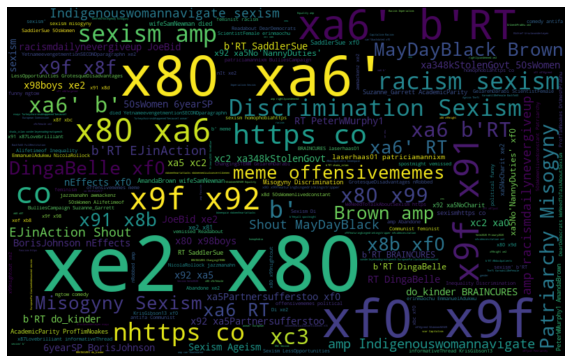

In [53]:
all_words = ' '.join([text for text in df['Tweets_new']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

## **STEMMING**

In [5]:
df=pd.read_csv('/content/drive/MyDrive/#sexism_tweets.csv')

In [6]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")

In [7]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [8]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
tokenized_tweet1 = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet1.head()

0    [Also, grouping, people, race, gender, homogen...
1    [There, enough, #racism, #sexism, #injustice, ...
2    [course, organisations, which, meant, help, re...
3    [Neha, Bhargava, explains, #marriage, #religio...
4    [Jesus, christ, n#meme, #offensivememes, #meme...
Name: tidy_tweet, dtype: object

In [10]:
tokenized_tweet1 = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet1.head()

0    [Also, grouping, people, race, gender, homogen...
1    [There, enough, #racism, #sexism, #injustice, ...
2    [course, organisations, which, meant, help, re...
3    [Neha, Bhargava, explains, #marriage, #religio...
4    [Jesus, christ, n#meme, #offensivememes, #meme...
Name: tidy_tweet, dtype: object

In [11]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet1 = tokenized_tweet1.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet1.head()

0    [also, group, peopl, race, gender, homogenis, ...
1    [there, enough, #racism, #sexism, #injustic, #...
2    [cours, organis, which, meant, help, redress, ...
3    [neha, bhargava, explain, #marriag, #religion,...
4    [jesu, christ, n#meme, #offensivemem, #meme, #...
Name: tidy_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet1)):
    tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])

df['tidy_tweet'] = tokenized_tweet1

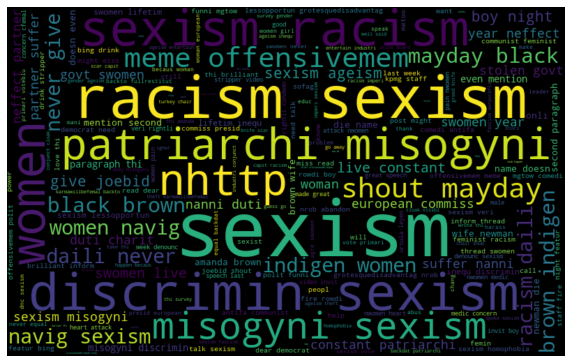

In [16]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()